In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../../weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

# Distribution and box Plot of Height

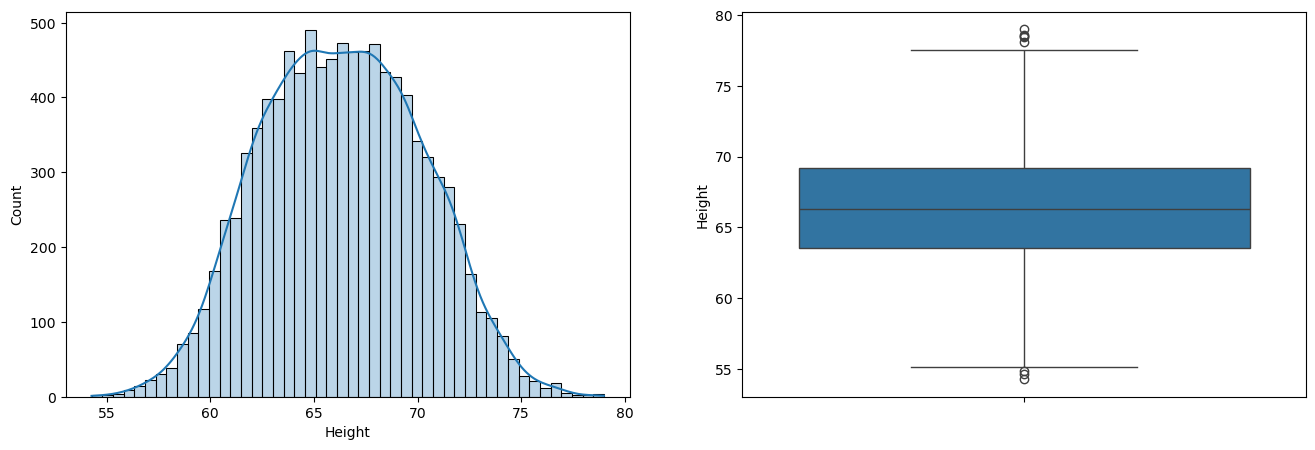

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['Height'], kde='true', alpha=0.3)

plt.subplot(122)
sns.boxplot(df['Height'])

plt.show()

It is normally distributed and it contain some outliers according to boxplot

# Performing percentile based outlier handling

In [6]:
# Finding upper and lower limit
upperlimit = df['Height'].quantile(0.99)
print("Upper limit: ",upperlimit)
lowerlimit = df['Height'].quantile(0.01)
print("Lower limit: ",lowerlimit)

Upper limit:  74.7857900583366
Lower limit:  58.13441158671655


We can decide upper and lower limit as per our choice in this method. For_eg: if we wanted to take 5 percentile gap(i.e 5% to 95%) we can take it

In [7]:
df[(df['Height']>upperlimit) | (df['Height']<lowerlimit)].shape

(200, 3)

There are 200 rows with outliers as per our outlier limit taken

## Handling Technique: Trimming

In [8]:
# Taking dataframe with no outliers in the variable "new_df"
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [9]:
new_df.shape

(9799, 3)

Shape of the dataset got reduced significantly

### Comparing

In [10]:
# Comparing mean, median , std etc
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [11]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Mean , std , and all percentiles are almost same but min and max values got changed

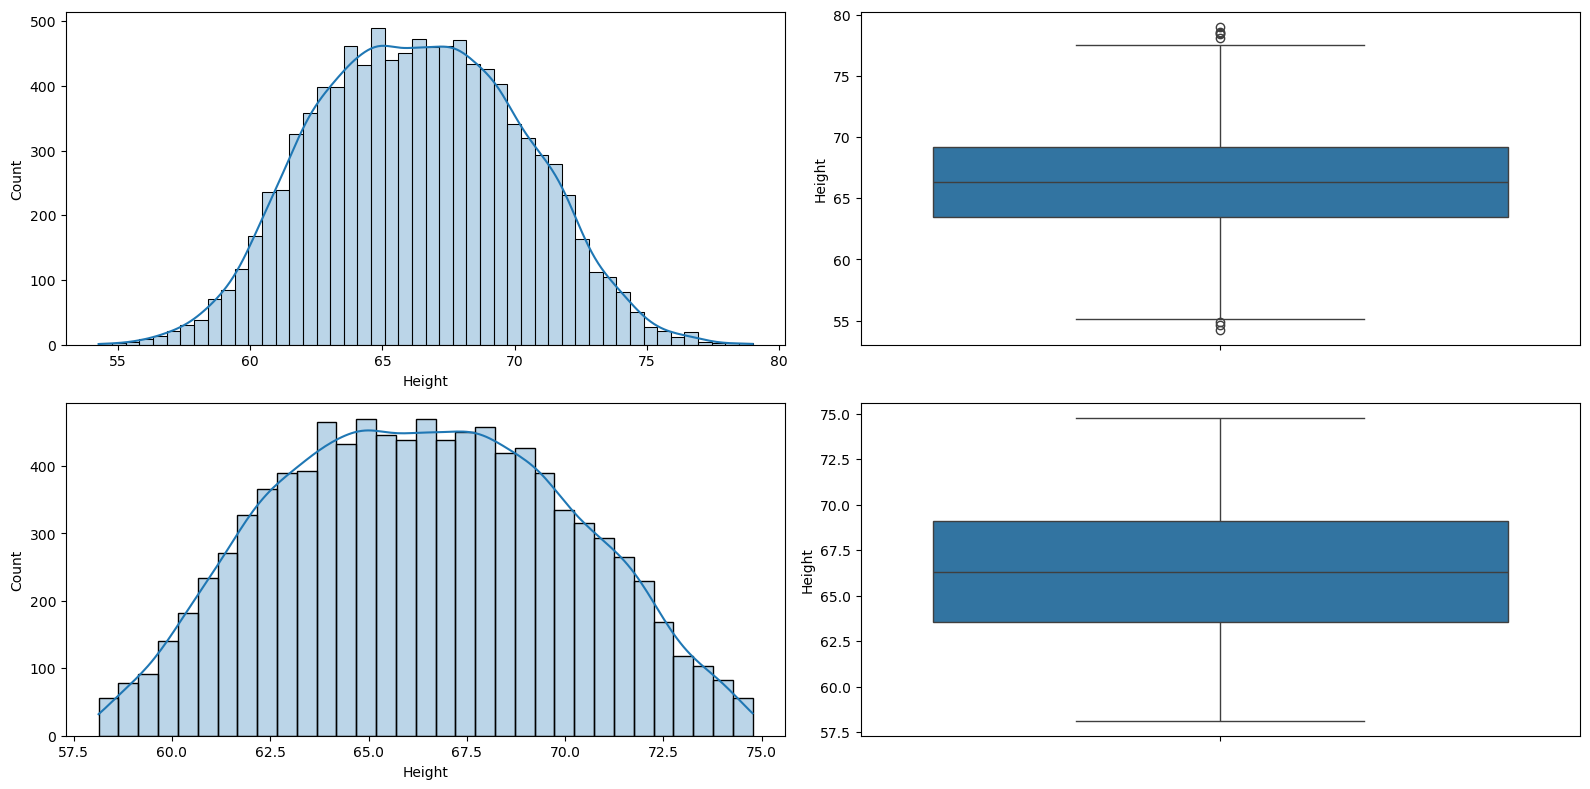

In [12]:
# Comparing dist and boxplot of the new and old dataset
plt.figure(figsize=(16, 8))

# Subplot 1: Histogram of Height
plt.subplot(221)  # Adjusted layout to 2x2 grid
sns.histplot(df['Height'], kde=True, alpha=0.3)

# Subplot 2: Boxplot of Height
plt.subplot(222)
sns.boxplot(df['Height'])

# Subplot 3: Histogram of Height in new_df
plt.subplot(223)
sns.histplot(new_df['Height'], kde=True, alpha=0.3)

# Subplot 4: Boxplot of Height in new_df
plt.subplot(224)
sns.boxplot(new_df['Height'])

# Automatically adjust the spacing
plt.tight_layout()

plt.show()


## Handling Technique: Capping

In [13]:
# Capping --> Winsorization
new_df_cap=df.copy()

new_df_cap['Height'] = np.where(df['Height'] >= upperlimit,
        upperlimit,
        np.where(df['Height'] <= lowerlimit,
        lowerlimit,
        df['Height']))

In [14]:
new_df_cap.shape

(10000, 3)

Shape of the dataset is still intact

### Comparing

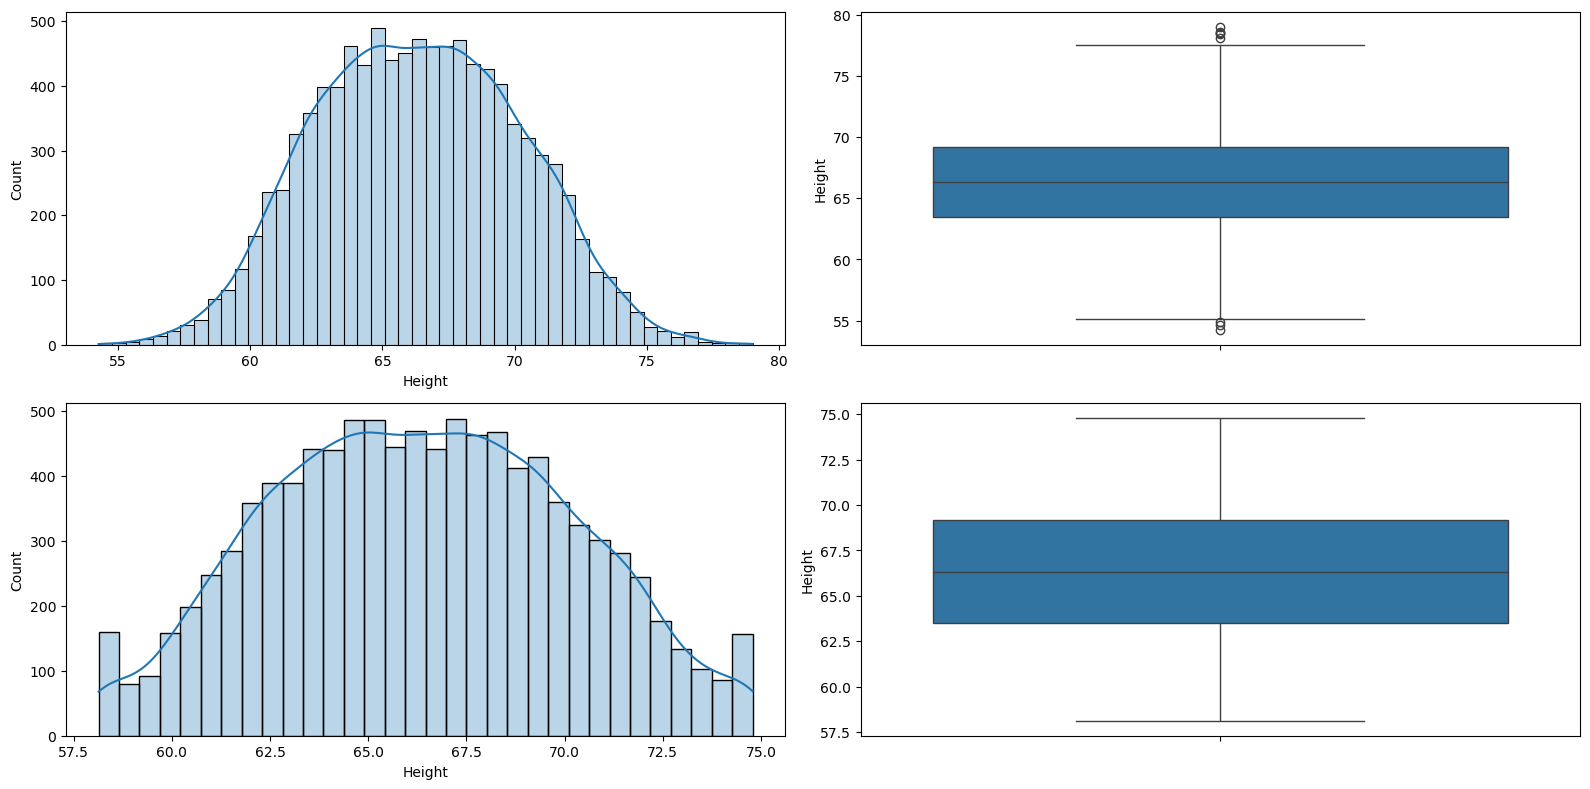

In [15]:
# Comparing dist and boxplot of the new and old dataset
plt.figure(figsize=(16, 8))

# Subplot 1: Histogram of Height
plt.subplot(221)  # Adjusted layout to 2x2 grid
sns.histplot(df['Height'], kde=True, alpha=0.3)

# Subplot 2: Boxplot of Height
plt.subplot(222)
sns.boxplot(df['Height'])

# Subplot 3: Histogram of Height in new_df_cap
plt.subplot(223)
sns.histplot(new_df_cap['Height'], kde=True, alpha=0.3)

# Subplot 4: Boxplot of Height in new_df_cap
plt.subplot(224)
sns.boxplot(new_df_cap['Height'])

# Automatically adjust the spacing
plt.tight_layout()

plt.show()
